In [6]:
import json
import pandas as pd
from rdkit import Chem 
import torch
from torch_geometric.data import Data
from rdkit import Chem
from rdkit.Chem import Draw

In [2]:
zinc_data = pd.read_csv("raw/250k_rndm_zinc_drugs_clean_3.csv",sep=",")
zinc_data.smiles = zinc_data.smiles.str.replace("\n", "")
zinc_data

,smiles,logP,qed,SAS
0,CC(C)(C)c1ccc2occ(CC(=O)Nc3ccccc3F)c2c1,5.05060,0.702012,2.084095
1,C[C@@H]1CC(Nc2cncc(-c3nncn3C)c2)C[C@@H](C)C1,3.11370,0.928975,3.432004
2,N#Cc1ccc(-c2ccc(O[C@@H](C(=O)N3CCCC3)c3ccccc3)...,4.96778,0.599682,2.470633
3,CCOC(=O)[C@@H]1CCCN(C(=O)c2nc(-c3ccc(C)cc3)n3c...,4.00022,0.690944,2.822753
4,N#CC1=C(SCC(=O)Nc2cccc(Cl)c2)N=C([O-])[C@H](C#...,3.60956,0.789027,4.035182
...,...,...,...,...
249450,CC1(C)CC[C@H](CNC(=O)Cn2ncc3ccccc3c2=O)c2ccccc21,3.36790,0.745901,2.900726
249451,Cn1ccnc1C(=O)c1ccc(NC(=O)C2CCN(C(=O)C(C)(C)C)C...,2.87430,0.799426,2.326627
249452,Cc1ccc(NC(=O)C(=O)N(C)Cc2ccccc2)c(C)c1,2.90054,0.878086,1.840642
249453,Cc1cc(C(=O)Nc2ccc(OCC(N)=O)cc2)c(C)n1C1CC1,2.55624,0.852917,2.024638


In [6]:
def mol_to_graph(mol):
    """
    Convert RDKit Mol object to PyTorch Geometric Data object
    """
    node_feats =[]

    for atom in mol.GetAtoms():
        node_feats.append([
            atom.GetAtomicNum(),
            atom.GetDegree(),
            atom.GetFormalCharge(),
            atom.GetNumImplicitHs(),
        ])    
    x = torch.tensor(node_feats,dtype=torch.float)

    edge_index = [] 
    edge_attr = []

    for bond in mol.GetBonds():
        i = bond.GetBeginAtomIdx()
        j =  bond.GetEndAtomIdx()
        edge_index += [[i,j],[j,i]]

        bt = bond.GetBondType()
        bond_type=[
            bt == Chem.rdchem.BondType.SINGLE,
            bt == Chem.rdchem.BondType.DOUBLE,
            bt == Chem.rdchem.BondType.TRIPLE,
            bt == Chem.rdchem.BondType.AROMATIC
        ]

        edge_attr += [bond_type, bond_type]
    edge_index = torch.tensor(edge_index, dtype=torch.long).t().contiguous()
    edge_attr = torch.tensor(edge_attr, dtype=torch.float)
    return Data(x=x, edge_index=edge_index, edge_attr=edge_attr)




In [ ]:
## Parse SMILES to RDKit Mol objects
zinc_data["graph_mol"]=zinc_data.smiles.apply(lambda x: Chem.MolFromSmiles(x))
zinc_data["graph"]=zinc_data.graph_mol.apply(lambda x: mol_to_graph(x))

In [22]:
zinc_data.to_csv("processed/250k_rndm_zinc_drugs_clean_3.csv", index=False)

In [7]:
zinc_data=pd.read_csv("processed/250k_rndm_zinc_drugs_clean_3.csv")

In [11]:
zinc_data

,smiles,logP,qed,SAS,graph_mol,graph
0,CC(C)(C)c1ccc2occ(CC(=O)Nc3ccccc3F)c2c1,5.05060,0.702012,2.084095,<rdkit.Chem.rdchem.Mol object at 0x000001B1DCD...,"Data(x=[24, 4], edge_index=[2, 52], edge_attr=..."
1,C[C@@H]1CC(Nc2cncc(-c3nncn3C)c2)C[C@@H](C)C1,3.11370,0.928975,3.432004,<rdkit.Chem.rdchem.Mol object at 0x000001B1DCD...,"Data(x=[21, 4], edge_index=[2, 46], edge_attr=..."
2,N#Cc1ccc(-c2ccc(O[C@@H](C(=O)N3CCCC3)c3ccccc3)...,4.96778,0.599682,2.470633,<rdkit.Chem.rdchem.Mol object at 0x000001B1DCD...,"Data(x=[29, 4], edge_index=[2, 64], edge_attr=..."
3,CCOC(=O)[C@@H]1CCCN(C(=O)c2nc(-c3ccc(C)cc3)n3c...,4.00022,0.690944,2.822753,<rdkit.Chem.rdchem.Mol object at 0x000001B1DCD...,"Data(x=[30, 4], edge_index=[2, 66], edge_attr=..."
4,N#CC1=C(SCC(=O)Nc2cccc(Cl)c2)N=C([O-])[C@H](C#...,3.60956,0.789027,4.035182,<rdkit.Chem.rdchem.Mol object at 0x000001B1DCD...,"Data(x=[28, 4], edge_index=[2, 60], edge_attr=..."
...,...,...,...,...,...,...
249450,CC1(C)CC[C@H](CNC(=O)Cn2ncc3ccccc3c2=O)c2ccccc21,3.36790,0.745901,2.900726,<rdkit.Chem.rdchem.Mol object at 0x000001B2B15...,"Data(x=[28, 4], edge_index=[2, 62], edge_attr=..."
249451,Cn1ccnc1C(=O)c1ccc(NC(=O)C2CCN(C(=O)C(C)(C)C)C...,2.87430,0.799426,2.326627,<rdkit.Chem.rdchem.Mol object at 0x000001B2B15...,"Data(x=[29, 4], edge_index=[2, 62], edge_attr=..."
249452,Cc1ccc(NC(=O)C(=O)N(C)Cc2ccccc2)c(C)c1,2.90054,0.878086,1.840642,<rdkit.Chem.rdchem.Mol object at 0x000001B2B15...,"Data(x=[22, 4], edge_index=[2, 46], edge_attr=..."
249453,Cc1cc(C(=O)Nc2ccc(OCC(N)=O)cc2)c(C)n1C1CC1,2.55624,0.852917,2.024638,<rdkit.Chem.rdchem.Mol object at 0x000001B2B15...,"Data(x=[24, 4], edge_index=[2, 52], edge_attr=..."


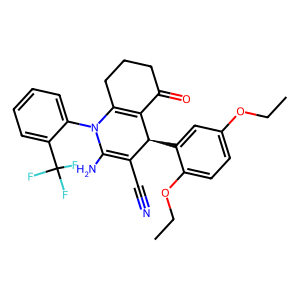

In [14]:
smiles = zinc_data.smiles.iloc[10]  # Example molecule (ethanol)
mol = Chem.MolFromSmiles(smiles)

Draw.MolToImage(mol,kekulize=True, wedgeBonds=True)


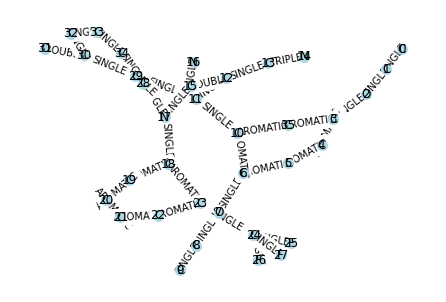

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from rdkit import Chem

def mol_to_nx(smiles):
    mol = Chem.MolFromSmiles(smiles)
    G = nx.Graph()

    for atom in mol.GetAtoms():
        G.add_node(atom.GetIdx(), label=atom.GetSymbol())

    for bond in mol.GetBonds():
        G.add_edge(
            bond.GetBeginAtomIdx(),
            bond.GetEndAtomIdx(),
            label=str(bond.GetBondType())
        )
    return G

# Visualize
smiles =zinc_data.smiles.iloc[10] 
G = mol_to_nx(smiles)
pos = nx.spring_layout(G)  # you can also try circular_layout
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=100)
labels = nx.get_node_attributes(G, 'label')
nx.draw_networkx_labels(G, pos, labels=labels)
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.show()
